In [1]:
import functools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def disk_cache(func):
    """Caches function output on disk.
    
    Uses function arguments to create cache file.
    """
    def wrapper(*args, **kwargs):
        items = [str(arg) for arg in args]
        for k, v in kwargs.items():
            items.append(str(k))
            items.append(str(v))
        filename = "_".join(items) + ".npy"
        try:
            result = np.load(filename)
        except IOError:
            result = func(*args, **kwargs)
            np.save(filename, result)
        return result
    return wrapper

In [3]:
def simulate(black_balls, red_balls, num_steps=10000):
    """Simulates Polya's Urn given the initial distribution.
    
    Args:
        black_balls: initial number of black balls.
        red_balls: initial number of red balls.
        
    Returns:
        2D array of black balls, red balls.
    """
    data = np.zeros((num_steps, 2))
    data[0] = [black_balls, red_balls]
    for i in range(1, num_steps):
        p = black_balls / (black_balls + red_balls)
        if np.random.rand() < p:
            # Draw a black ball
            black_balls += 1
        else:
            red_balls += 1
        data[i] = black_balls, red_balls
    return data

In [4]:
@functools.lru_cache() # In-memory LRU cache
@disk_cache # On-disk file cache
def run_simulations(black_balls, red_balls, num_simulations=1000, num_steps=1000):
    """Runs num_simulations simulations, plots their results,
    and displays information about the converged probabilities.
    
    Args:
        black_balls: initial number of black balls.
        red_balls: initial number of red balls
        num_simulations: number of simulations to run.
        
    Returns:
        3D array of size (num_simulations, num_steps, 2) containing
        number of black balls and red balls for each time step for each simulation.
    """
    data = np.zeros((num_simulations, num_steps, 2))
    for i in range(num_simulations):
        data[i] = simulate(black_balls, red_balls, num_steps)
    return data

In [5]:
def describe_distribution(black_balls, red_balls, num_simulations=1000, num_steps=1000):
    data = run_simulations(black_balls, red_balls, num_simulations, num_steps)
    ps = data[:, :, 0] / np.sum(data, axis=2)
    for row in ps:
        plt.plot(row)
    plt.title("Probability starting with {} black balls and {} red balls".format(black_balls, red_balls))
    plt.xlabel("Time step")
    plt.ylabel("Probability of choosing a black ball")
    plt.show()

    converged_ps = ps[:,-1]
    plt.hist(converged_ps)
    plt.xlabel("Converged probability of choosing a black ball")
    plt.ylabel("Frequency")
    plt.title(("Distribution of probability of choosing a black ball\n"
               "starting with {} black balls and {} red balls\n"
               "after {} simulations for {} time steps")
              .format(black_balls, red_balls, num_simulations, num_steps))
    plt.show()
    
    print("Mean of converged probabilities: {0:.3f}".format(np.mean(converged_ps)))
    print("Variance of converged probailities: {0:.3f}".format(np.var(converged_ps)))

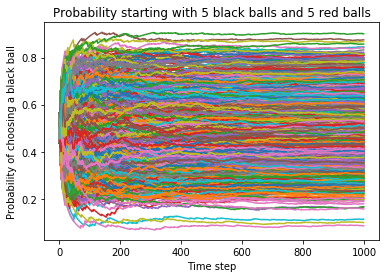

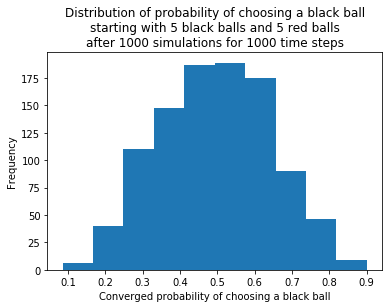

Mean of converged probabilities: 0.497
Variance of converged probailities: 0.022


In [6]:
q

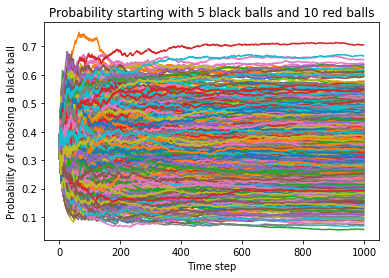

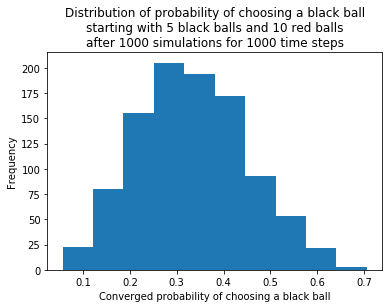

Mean of converged probabilities: 0.334
Variance of converged probailities: 0.014


In [7]:
describe_distribution(5, 10)

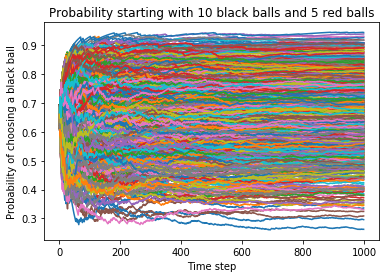

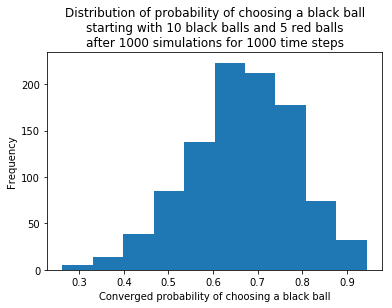

Mean of converged probabilities: 0.665
Variance of converged probailities: 0.014


In [8]:
describe_distribution(10, 5)

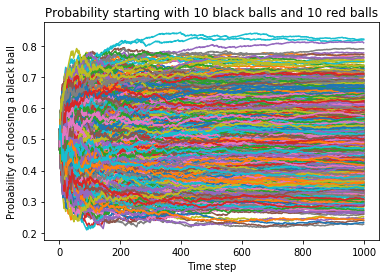

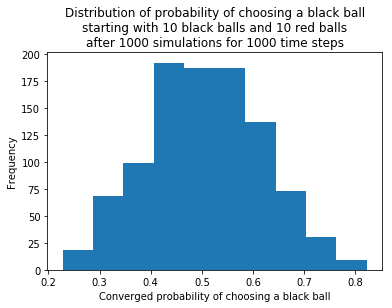

Mean of converged probabilities: 0.506
Variance of converged probailities: 0.012


In [9]:
describe_distribution(10, 10)